In [157]:
#note to self clean this code up very very messy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
cultivar_mix_data_20 = pd.read_csv(r"/home/simmondsh/Desktop/git_repos/cultivar_mixture_modelling/cultivar_mix_disease_scoring_2020.csv", header = 0)
cultivar_mix_data_20[["Trat","Cultivar","Plot"]].astype(str)

,Trat,Cultivar,Plot
0,C1,C,A1
1,C1,C,A1
2,C1,C,A1
3,C1,C,A1
4,C1,C,A1
...,...,...,...
355,A3C1,C,E3
356,A3C1,A,E3
357,A3C1,C,E3
358,A3C1,A,E3


In [159]:
cultivar_mix_data_20_Z = cultivar_mix_data_20[["Trat", "Cultivar","Z1","Z2","Z3","Z4"]]


#df["diagnosis"].replace({"B": 0, "M": 1}, inplace=True)
cultivar_mix_data_20_Z ["Trat"].replace({"C1":100, "A1C3":75, "A1C1":50, "A3C1":25, "A1":0}, inplace = True)

/tmp/ipykernel_5460/2176519465.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cultivar_mix_data_20_Z ["Trat"].replace({"C1":100, "A1C3":75, "A1C1":50, "A3C1":25, "A1":0}, inplace = True)


In [160]:
Z_all = cultivar_mix_data_20_Z.groupby(["Trat","Cultivar"]).mean().reset_index()
Z_all

,Trat,Cultivar,Z1,Z2,Z3,Z4
0,0,A,1.888889,8.933333,19.261905,18.800000
1,25,A,1.866667,9.733333,16.846154,20.000000
2,25,C,0.288889,1.511111,5.976744,11.625000
3,50,A,1.644444,7.000000,15.692308,16.777778
4,50,C,0.533333,1.955556,8.522727,20.833333
5,75,A,2.822222,9.545455,21.358974,20.900000
6,75,C,0.600000,4.066667,13.023810,21.260870
7,100,C,0.600000,3.822222,15.545455,17.210526


In [161]:

df = cultivar_mix_data_20_Z.drop(['Cultivar'], axis = 1)
df = df.groupby(["Trat"]).mean().reset_index()

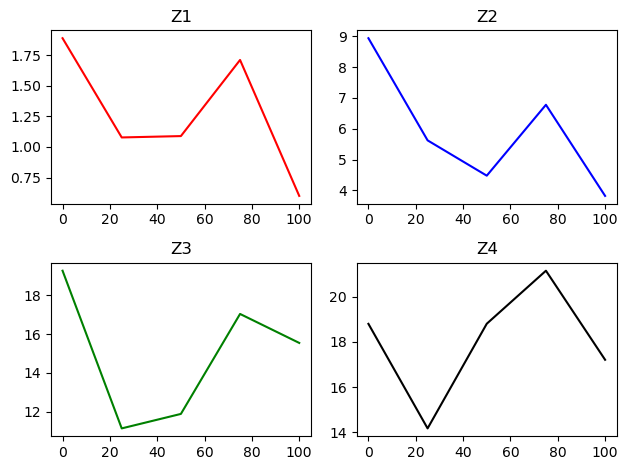

In [162]:
# very simple subplots of 2020 Z data of mixture %
# from the prepective of the cellule cultivar 

fig, axs = plt.subplots(2,2)
axs[0,0].plot(df['Trat'],df['Z1'], color = 'Red')
axs[0,0].set_title("Z1")

axs[0,1].plot(df['Trat'],df['Z2'], color = 'Blue')
axs[0,1].set_title("Z2")

axs[1,0].plot(df['Trat'],df['Z3'], color = 'Green')
axs[1,0].set_title("Z3")

axs[1,1].plot(df['Trat'],df['Z4'], color = 'Black')
axs[1,1].set_title("Z4")

fig.tight_layout()
#look into wieghts of the means based on %

In [163]:
# right now lets seperate by cultivars
apache_2020 = cultivar_mix_data_20_Z[cultivar_mix_data_20_Z["Cultivar"] == "A"]
cellule_2020 = cultivar_mix_data_20_Z[cultivar_mix_data_20_Z["Cultivar"] == "C"]

apache_2020 = apache_2020.drop(['Cultivar'], axis = 1)
apache_2020_mean = apache_2020.groupby(["Trat"]).mean().reset_index()

apache_2020_mean


,Trat,Z1,Z2,Z3,Z4
0,0,1.888889,8.933333,19.261905,18.800000
1,25,1.866667,9.733333,16.846154,20.000000
2,50,1.644444,7.000000,15.692308,16.777778
3,75,2.822222,9.545455,21.358974,20.900000


In [164]:

cellule_2020 = cellule_2020.drop(['Cultivar'], axis = 1)
cellule_2020_mean = cellule_2020.groupby(["Trat"]).mean().reset_index()
cellule_2020_mean

,Trat,Z1,Z2,Z3,Z4
0,25,0.288889,1.511111,5.976744,11.625000
1,50,0.533333,1.955556,8.522727,20.833333
2,75,0.600000,4.066667,13.023810,21.260870
3,100,0.600000,3.822222,15.545455,17.210526


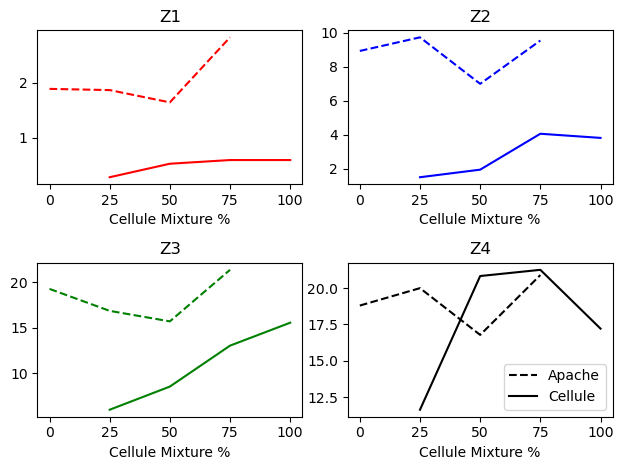

In [165]:
fig, axs = plt.subplots(2,2)

axs[0,0].plot(apache_2020_mean['Trat'],apache_2020_mean['Z1'], color = 'Red', linestyle = "--")
axs[0,0].plot(cellule_2020_mean['Trat'],cellule_2020_mean['Z1'], color = 'Red')
axs[0,0].set_title("Z1")
axs[0,0].set_xticks([0,25,50,75,100])
axs[0,0].set_xlabel("Cellule Mixture %")

axs[0,1].plot(apache_2020_mean['Trat'],apache_2020_mean['Z2'], color = 'Blue', linestyle ="--")
axs[0,1].plot(cellule_2020_mean['Trat'],cellule_2020_mean['Z2'], color = 'Blue')
axs[0,1].set_title("Z2")
axs[0,1].set_xticks([0,25,50,75,100])
axs[0,1].set_xlabel("Cellule Mixture %")

axs[1,0].plot(apache_2020_mean['Trat'],apache_2020_mean['Z3'], color = 'Green', linestyle ="--")
axs[1,0].plot(cellule_2020_mean['Trat'],cellule_2020_mean['Z3'], color = 'Green')
axs[1,0].set_title("Z3")
axs[1,0].set_xticks([0,25,50,75,100])
axs[1,0].set_xlabel("Cellule Mixture %")

axs[1,1].plot(apache_2020_mean['Trat'],apache_2020_mean['Z4'], color = 'Black', linestyle ="--")
axs[1,1].plot(cellule_2020_mean['Trat'],cellule_2020_mean['Z4'], color = 'Black')
axs[1,1].set_title("Z4")
axs[1,1].set_xticks([0,25,50,75,100])
axs[1,1].set_xlabel("Cellule Mixture %")


plt.legend(["Apache", "Cellule"])
fig.tight_layout()


In [166]:
cellule_2020_mean.insert(5, 'w',[0.25,0.5,0.75,1], True)
cellule_2020_mean

,Trat,Z1,Z2,Z3,Z4,w
0,25,0.288889,1.511111,5.976744,11.625000,0.25
1,50,0.533333,1.955556,8.522727,20.833333,0.50
2,75,0.600000,4.066667,13.023810,21.260870,0.75
3,100,0.600000,3.822222,15.545455,17.210526,1.00


In [167]:
cellule_2020_mean['Z2Wc'] = cellule_2020_mean['Z2']*cellule_2020_mean['w']
cellule_2020_mean['Z3Wc'] = cellule_2020_mean['Z3']*cellule_2020_mean['w']
cellule_2020_mean


,Trat,Z1,Z2,Z3,Z4,w,Z2Wc,Z3Wc
0,25,0.288889,1.511111,5.976744,11.625000,0.25,0.377778,1.494186
1,50,0.533333,1.955556,8.522727,20.833333,0.50,0.977778,4.261364
2,75,0.600000,4.066667,13.023810,21.260870,0.75,3.050000,9.767857
3,100,0.600000,3.822222,15.545455,17.210526,1.00,3.822222,15.545455


In [168]:
apache_2020_mean.insert(5, 'w',[1,0.75,0.5,0.25,], True)
apache_2020_mean

,Trat,Z1,Z2,Z3,Z4,w
0,0,1.888889,8.933333,19.261905,18.800000,1.00
1,25,1.866667,9.733333,16.846154,20.000000,0.75
2,50,1.644444,7.000000,15.692308,16.777778,0.50
3,75,2.822222,9.545455,21.358974,20.900000,0.25


In [169]:
apache_2020_mean['Z2Wa'] = apache_2020_mean['Z2']*apache_2020_mean['w']
apache_2020_mean['Z3Wa'] = apache_2020_mean['Z3']*apache_2020_mean['w']
apache_2020_mean

,Trat,Z1,Z2,Z3,Z4,w,Z2Wa,Z3Wa
0,0,1.888889,8.933333,19.261905,18.800000,1.00,8.933333,19.261905
1,25,1.866667,9.733333,16.846154,20.000000,0.75,7.300000,12.634615
2,50,1.644444,7.000000,15.692308,16.777778,0.50,3.500000,7.846154
3,75,2.822222,9.545455,21.358974,20.900000,0.25,2.386364,5.339744


Text(0.5, 0, 'Cellule Mixture %')

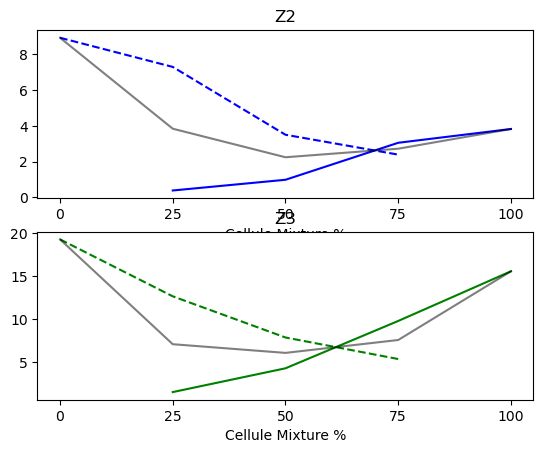

In [176]:
fig, axs = plt.subplots(2)

axs[0].plot(apache_2020_mean['Trat'],apache_2020_mean['Z2Wa'], color = 'Blue', linestyle ="--")
axs[0].plot(cellule_2020_mean['Trat'],cellule_2020_mean['Z2Wc'], color = 'Blue')
axs[0].plot([0,25,50,75,100],[8.933333,3.838889,2.238889,2.718182,3.822222], color ="Black", alpha = 0.5)
axs[0].set_title("Z2")
axs[0].set_xticks([0,25,50,75,100])
axs[0].set_xlabel("Cellule Mixture %")

axs[1].plot(apache_2020_mean['Trat'],apache_2020_mean['Z3Wa'], color = 'Green', linestyle ="--")
axs[1].plot(cellule_2020_mean['Trat'],cellule_2020_mean['Z3Wc'], color = 'Green')
axs[1].plot([0,25,50,75,100],[19.261905,7.0644005,6.053759,7.5538005,15.545455], color ="Black", alpha = 0.5)
axs[1].set_title("Z3")
axs[1].set_xticks([0,25,50,75,100])
axs[1].set_xlabel("Cellule Mixture %")

In [171]:
#Need to test these points stats to see if they are signifcant
#also I need to add both cultivars to each plot